# Linear regression

Import all the modules

In [112]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot

# Model instantiation
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [113]:

def get_path(filename):
    """Function that gets the path to the data file"""
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Load the DataFrame
fram = pd.read_csv(get_path("fram.txt"), sep="\t")

# Confirm that all the columns ha
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [114]:

def rescale(col_Series):
    """Centres the data and normalized the values by dividing by (2 * SD)"""
    r_series = (col_Series - col_Series.mean()) / (2*col_Series.std())
    
    return r_series

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [115]:
# Append the scaled version of the variables
for column in fram.columns:
    # Use try and catch to sort out the non_continuous variable columns
    try:
        # Scale the current column
        r_column = rescale(fram[column])
        # Change the name of the column series to show it's scaled
        r_column.name = "s" + r_column.name
        
        # Concatenate the scaled column to original Data Frame
        fram = pd.concat([fram, r_column], axis = 1)
        
    except:
        continue

fram.describe()


,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,...,sAGE,sFRW,sSBP,sSBP10,sDBP,sCHOL,sCIG,sCHD,sDEATH,sYRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,...,1.394000e+03,1.394000e+03,1.394000e+03,7.670000e+02,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,...,1.288623e-16,-1.162787e-17,-8.123583e-17,1.353401e-17,1.358435e-16,-3.038379e-17,-2.352733e-15,-1.355882e-15,1.074065e-15,1.044597e-15
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,...,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,...,-7.770703e-01,-1.503033e+00,-1.036435e+00,-1.051097e+00,-1.410618e+00,-1.497122e+00,-3.465693e-01,-2.270565e-01,-2.654996e-01,-1.940565e+00
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,...,-4.633616e-01,-3.200998e-01,-3.227115e-01,-3.508899e-01,-3.562285e-01,-3.741042e-01,-3.465693e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,...,-4.508343e-02,-6.661422e-02,-1.085945e-01,-5.913675e-02,-4.765177e-03,-5.015684e-02,-3.465693e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,...,3.731948e-01,2.432015e-01,2.125810e-01,2.326164e-01,2.764055e-01,3.169835e-01,5.166802e-01,-2.270565e-01,-2.654996e-01,2.270212e-01
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,...,1.000612e+00,3.285029e+00,2.710613e+00,2.255438e+00,2.455478e+00,2.109492e+00,2.243179e+00,1.684276e+00,1.295472e+00,2.270212e-01


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [118]:
# Initialize statsmodel OLS model using sbp as target and weight, gender & cholesterol as explanatory variables
model = smf.ols('SBP ~ sFRW + SEX + sCHOL', data = fram)

# Fit the model
fit = model.fit()

print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.13e-40
Time:                        00:51:32   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [95]:
# Fit a model with age included
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE', data = fram).fit()

# Check the summary
print(fit.summary())



                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.44e-46
Time:                        00:46:47   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Inclusion of age increases the explanatory power of the model from 0.125 to 0.146. Therefore by 0.012.

The variables sFRW, sAGE, sCHOL and SEX[T.male] respectively explain the variance of the target most to least. 

***

Try to add to the model all the interactions with other variables. 

In [119]:

fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL' , data = fram).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.92e-43
Time:                        00:51:38   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

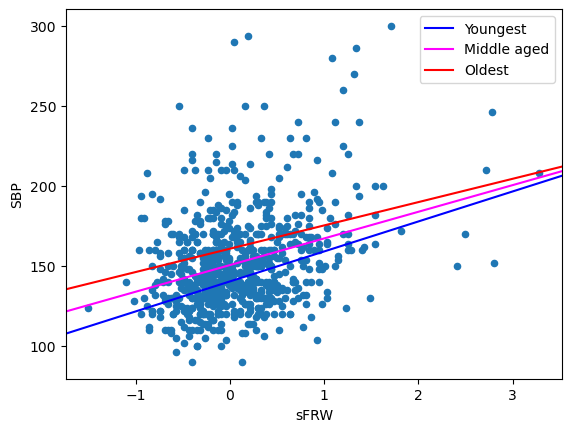

In [97]:

fram[(fram.SEX == "female")].plot.scatter("sFRW", "SBP")

# Intercept for all the age ranges
int_young = fit.params.Intercept - fit.params["sAGE"]
int_middle = fit.params.Intercept
int_old = fit.params.Intercept + fit.params["sAGE"]
# Slope for all the age ranges
slope_young = fit.params.sFRW - fit.params["sAGE:sFRW"]
slope_middle = fit.params.sFRW
slope_old = fit.params.sFRW + fit.params["sAGE:sFRW"]

# Youngest
abline_plot(intercept=int_young, slope=slope_young, ax=plt.gca(), color="blue", label="Youngest")
# Middle Aged
abline_plot(intercept=int_middle, slope=slope_middle, ax=plt.gca(), color="magenta", label="Middle aged")
# Oldest
abline_plot(intercept=int_old, slope=slope_old, ax=plt.gca(), color="red", label="Oldest")

plt.legend()


How does the dependence of blood pressure on weight change as a person gets older?
***

The lines for all the ages seem to converge as the weight of the person increases. Therefore we can conclude that at older ages, the dependancy of a women's blood pressure on weight decreases as the weight gets higher. 

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.99e-40
Time:                        00:52:03   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

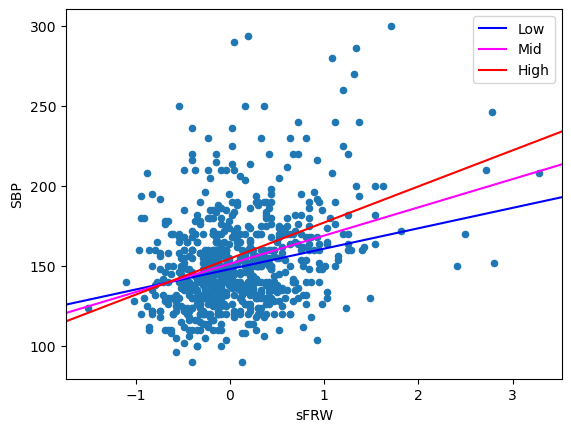

In [122]:
# Initialize the model with all the variables and their relationships
fit = smf.ols('SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE' , data = fram).fit()

# Let's try and see the summary of the model
print(fit.summary())

fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP") 

# Intercept for all the age ranges
int_low = fit.params.Intercept - fit.params["sCHOL"]
int_mid = fit.params.Intercept
int_high = fit.params.Intercept + fit.params["sCHOL"]
# Slope for all the age ranges
slope_low = fit.params.sFRW - fit.params["sCHOL:sFRW"]
slope_mid = fit.params.sFRW
slope_high = fit.params.sFRW + fit.params["sCHOL:sFRW"]

# Low CHOL
abline_plot(intercept=int_low, slope=slope_low, ax=plt.gca(), color="blue", label="Low")
# Mid CHOL
abline_plot(intercept=int_mid, slope=slope_mid, ax=plt.gca(), color="magenta", label="Mid")
# High CHOL
abline_plot(intercept=int_high, slope=slope_high, ax=plt.gca(), color="red", label="High")

plt.legend()

How does the model and its accuracy look?

***

The explanatory power of the model did not change this time round. However we can now see that the added variable explains well its relationship with other variables, most notably with the CHOL. The population with high cholesterol seem to have higher blood pressure at higher weights (mostly on weights above the groups median).

***

# Logistic regression

In [123]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [124]:

# Create the column for HIGH BP in binary values
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

# Initialize the model and fit the training data
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()

# Compute the root mean square
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
# error_rate_orig

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [125]:

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + SEX:sAGE", data=fram, family=sm.families.Binomial()).fit()

# Compute the root mean square
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
# error_rate
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Mon, 30 Jan 2023   Deviance:                       1691.0
Time:                        00:52:10   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07865
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

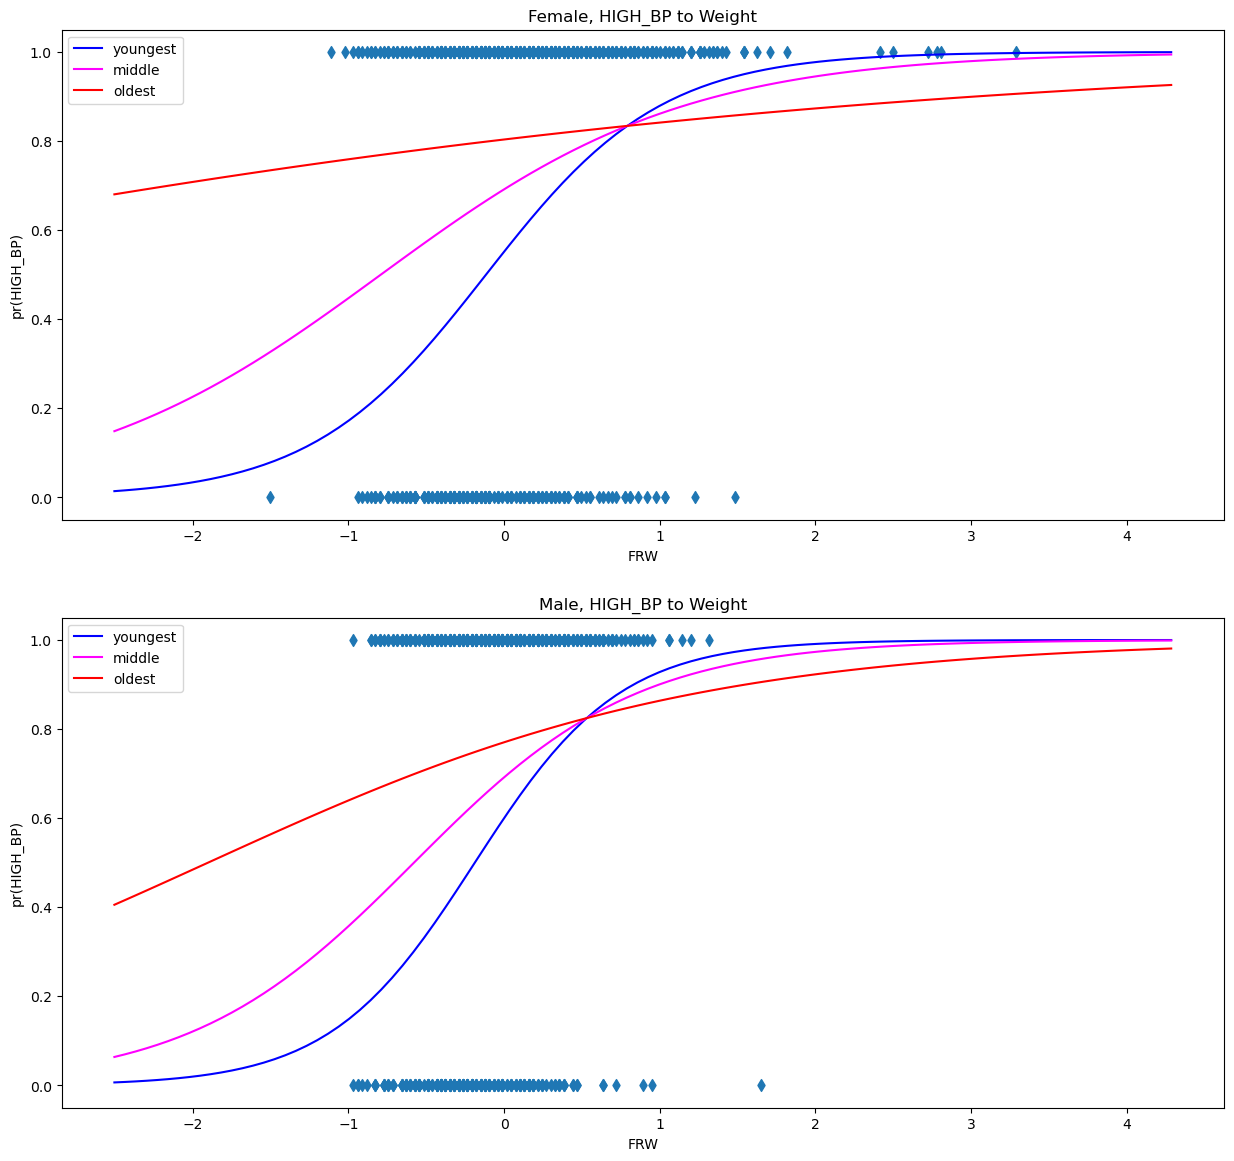

In [126]:

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

frw_min = fram.sFRW.min() - 1
frw_max = fram.sFRW.max() + 1
X = np.linspace(frw_min, frw_max, 100)

# Create and axes for 2 figures
fig, ax = plt.subplots(2, 1, subplot_kw={"xlabel":"FRW", "ylabel":"pr(HIGH_BP)"}, figsize=(15, 14))

# Intercept for all the age ranges
int_young = fit.params.Intercept - fit.params["sAGE"]
int_middle = fit.params.Intercept
int_old = fit.params.Intercept + fit.params["sAGE"]
# Slope for all the age ranges
slope_young = fit.params.sFRW - fit.params["sAGE:sFRW"]
slope_middle = fit.params.sFRW
slope_old = fit.params.sFRW + fit.params["sAGE:sFRW"]


# Make edits to the two figures
# Figure for female participants
ax[0].scatter(fram.sFRW[fram.SEX=="female"], fram.HIGH_BP[fram.SEX=="female"], marker="d")
ax[0].plot(X, logistic(X*slope_young + int_young ), color="blue", label="youngest")          
ax[0].plot(X, logistic(X*slope_middle + int_middle ), color="magenta", label="middle") 
ax[0].plot(X, logistic(X*slope_old + int_old ), color="red", label="oldest")          

ax[0].set_title("Female, HIGH_BP to Weight")
ax[0].legend()

# Figure for male participants
ax[1].scatter(fram.sFRW[fram.SEX=="male"], fram.HIGH_BP[fram.SEX=="male"], marker="d")
ax[1].plot(X, logistic(X*(slope_young + fit.params["SEX[T.male]:sFRW"]) + int_young - fit.params["SEX[T.male]"]), color="blue", label="youngest")          
ax[1].plot(X, logistic(X*(slope_middle + fit.params["SEX[T.male]:sFRW"]) + int_middle ), color="magenta", label="middle")
ax[1].plot(X, logistic(X*(slope_old + fit.params["SEX[T.male]:sFRW"]) + int_old + fit.params["SEX[T.male]"]), color="red", label="oldest")

ax[1].set_title("Male, HIGH_BP to Weight")
ax[1].legend()

How do the models with different ages and genders differ from each other?

***
There seems to be a small difference between both genders in the young population. However the older population has a higer probability of high blood pressure across all weights in the female population as compared to the male population. 

Most notably, all ages have the same probability of a HIGH_BP at a standadized weight of approximately 0.8 in the female population and approximately the mean weight in the male population. 
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [127]:
# exercise 12
# Put your solution here!

def train_test_split(df, train_fraction = 0.8):
    train_data = df.sample(frac=train_fraction, replace=False)
    # Left merge the original dataframe with the train data
    merge_df = df.merge(train_data, on=list(df.columns), how='left', indicator=True)
    
    # Create a mask based off of the merge to get the test data
    mask = merge_df['_merge'] == "left_only"
    test_data = df[mask]

    # Return the train and test data
    return (train_data, test_data)


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [128]:
np.random.seed(1)
error_model=[] 
error_null=[]

for x in range(100):
    # Split the dataframe into train and test 
    train, test = train_test_split(fram, train_fraction=0.8)

    # Create the model
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + SEX:sAGE", data=train, family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

    # Predict using the the test data
    pred = fit.predict(test, transform=True)

    # Check the error where it predicted probabily of < 0.5 but was high_bp or inverse
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP == 1)) | ((pred > 0.5) & (test.HIGH_BP == 0)))
    # Append the error to the orig list
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

pd.Series(error_model).mean(), pd.Series(error_null).mean()

(0.3311827956989248, 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [129]:

# Values higher than 0 indicate the person has coronary heart disease
fram["hasCHD"] = fram.CHD > 0
# Map to int so that the bool values can be converted to 1 (true) and 0 (false)
fram["hasCHD"] = fram.hasCHD.map(int)

# # Sanity check
# 1 - np.mean(fram.hasCHD)

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [133]:

# Create a logistic regression model
fit = smf.glm(formula="hasCHD ~ sFRW + sCHOL + sCHOL:sFRW + sCIG + sCIG:sFRW + sCIG:sCHOL", data = fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

# Compute the accuracy of the model
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD))
    
# error_rate
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Mon, 30 Jan 2023   Deviance:                       1442.4
Time:                        00:53:29   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.000      -1.421      -1.157
sFRW           0.4404      0.130      3.386      0.001       0.185       0.695
sCHOL          0.3324      0.130      2.554      0.011       0.077       0.587
sCHOL:sFRW     0.1359      0.239      0.568      0.570      -0.333       0.604
sCIG           0.4613      0.126      3.666      0.000       0.215       0.708
sCIG:sFRW      0.1646      0.258      0.637      0.524      -0.342       0.671
sCIG:sCHOL    -0.1022      0.273     -0.374      0.708      -0.637       0.433
==============================================================================
"""

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

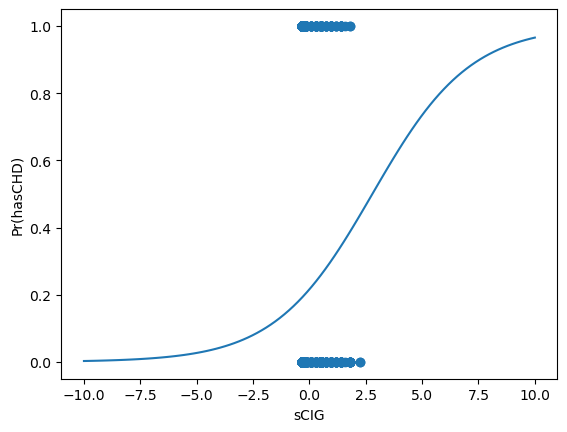

In [141]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

cig_min = fram.sCIG.min() - 1
cig_max = fram.sCIG.max() + 1
X = np.linspace(-10, 10, 100)

# print(fit.summary())

incpt = fit.params.Intercept
slope = fit.params.sCIG 

plt.scatter(fram.sCIG, fram.hasCHD, )
plt.plot(X, logistic(X*(slope) + incpt))
plt.xlabel("sCIG")
plt.ylabel("Pr(hasCHD)")

plt.show()

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The prediction accuracy of the model is good. Considering that the base rate is approximately 0.77977, the error rate we calculated (0.22023) is seen to be significantly lower than this value. Hence we can be confident that the model can be used practically.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [84]:

# Add the data to the original columns
data_df = pd.concat([fram[["CHOL", "CIG", "FRW"]], pd.DataFrame({"CHOL":[200], "CIG":[17], "FRW":[100]})])

# Normalize the values  **Remember the function 'rescale' does the same but for columns
norm_values = []
for column in data_df:
    norm_col = rescale(data_df[column])
    norm_values.append(norm_col.iloc[-1])

# Store the normalized values in a dictionary
point = {"sCHOL":norm_values[0], "sCIG":norm_values[1], "sFRW":norm_values[2]}

# Initialize the model then fit it
fit = smf.glm(formula="hasCHD ~ sFRW + sCHOL + sCHOL:sFRW + sCIG + sCIG:sFRW + sCIG:sCHOL", data = fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

# Predict using the model
predicted = fit.predict(point).iloc[0]

# predicted